<head>
    <style>
        .md-typeset h2 {
            margin:0;
            }
        .md-typeset h3 {
            margin:0;
            }
        .jupyter-wrapper table.dataframe tr, .jupyter-wrapper table.dataframe th, .jupyter-wrapper table.dataframe td {
            text-align:left;
            }
        .jupyter-wrapper table.dataframe {
            table-layout: auto;
            }
        .jp-RenderedText pre {
            display: inline-block;
            overflow-x: auto;
            width: max-content;
        }
    </style>
</head>

# Student's t-test

Please watch this video first to know the history of student's t-test.

<iframe width="560" height="315" src="https://www.youtube.com/embed/Ea4_eX--mIY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

For those who want to know more about the history of student's t-test, 
you can read [this paper](https://drive.google.com/file/d/1DE1noLgz-TRFuv3Md9V0Mlof_J8VMnRv/view?usp=sharing).

## when do we need student's t-test?

We use student's t-test when:

* the sample size is small
* the standard deviation for population is not known (meaning it has to be estimated)

## A Example

We will use a dataset of hish school students' grade to run a simple 
`student's t-test`. 

In [1]:
// load the dataset online 
use https://stats.idre.ucla.edu/stat/stata/notes/hsb2, clear

(highschool and beyond (200 cases))


In [2]:
// describe
describe


Contains data from https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
  obs:           200                          highschool and beyond (200 cases)
 vars:            11                          17 Jun 2002 08:48
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
female          float   %9.0g      fl         
race            float   %12.0g     rl         
ses             float   %9.0g      sl         
schtyp          float   %9.0g      scl        type of school
prog            float   %9.0g      sel        type of program
read            float   %9.0g                 reading score
write           float   %9.0g                 writing score
math            float   %9.0g                 math score
science         float   %9.0g 

In [3]:
// check the statistic summary of female
summarize female


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      female |        200        .545    .4992205          0          1


In [4]:
// label the variable
label variable female "gender information female=1, male=0"

In [5]:
// check the share of female
tabulate female


     gender |
information |
  female=1, |
     male=0 |      Freq.     Percent        Cum.
------------+-----------------------------------
       male |         91       45.50       45.50
     female |        109       54.50      100.00
------------+-----------------------------------
      Total |        200      100.00


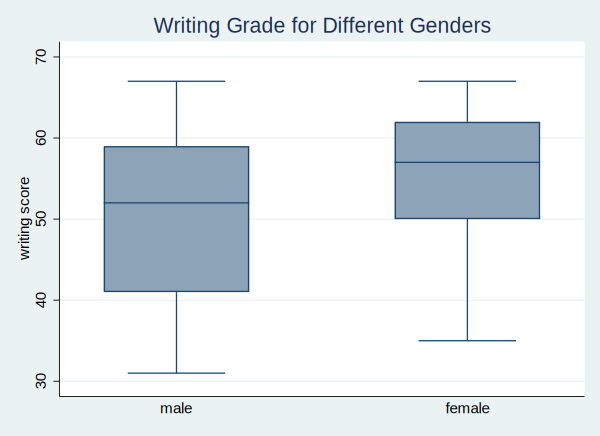

In [7]:
// check write score cross genders
graph box write, over(female) title("Writing Grade for Different Genders")

### Single sample t-test

Suppose this sample was collected randomly across all states of the US, which 
means it could represent the population well (of course, this is not the 
case for this sample as we only have a small number of observation). Now, 
as a researcher you set up the following hypothesis:

- $H_0$: the population mean of reading score is 50
- $H_1$: the population mean of reading score is not 50

Please run the following command to test the above hypothesis.

In [8]:
ttest read == 50


One-sample t test
------------------------------------------------------------------------------
Variable |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
    read |     200       52.23    .7249921    10.25294    50.80035    53.65965
------------------------------------------------------------------------------
    mean = mean(read)                                             t =   3.0759
Ho: mean = 50                                    degrees of freedom =      199

    Ha: mean < 50               Ha: mean != 50                 Ha: mean > 50
 Pr(T < t) = 0.9988         Pr(|T| > |t|) = 0.0024          Pr(T > t) = 0.0012


__Questions__: 

1. what is the sample size?
2. what is the mean of the read score?
3. what is the standard deviation of the read score?
4. what is the standard error?
5. should you reject or accept $H_0$? why?

### Understanding the t-test 

The t-test is any statistical hypothesis test in which the test statistic
 follows a Student's t-distribution under the null hypothesis. It has the 
 following formula:

 \begin{equation}
 t = \frac{m-\mu}{s/\sqrt{n}}
 \end{equation}

where:

- $m$: mean you calculated or Stata calculated for you
- $\mu$: the theoretical value you believe that the population should have
- $s$: standard deviation
- $n$: sample size

Now, please run the following command and compare the result with the 
one returned from Stata when you run `ttest read==50`

In [9]:
display (52.23-50)/0.725

3.0758621


The above command calculates the t-ratio that is also included in the table 
returned by Stata when you run `ttest read==50`. So, what is t-ratio then? In 
statistics, the t-statistic is the ratio of the departure of the
estimated value of a parameter from its hypothesized value to its standard error. 

In our case,

- we assumed the theoretical value is 50, that is why we want test whether read == 50 or not
- now we calculate the mean of the read score (it is 52.23)
- we want to check the departure of the estimated value of a parameter from its hypothesized value to its standard error

Why we need to divide the standard error? The standard error is the 
standard deviation of its sampling distribution or an estimate of that 
standard deviation. You could think in this way. If you want to investigate how 
likely the mean of population height could be around 180cm?

If you collect a representative sample (of course it would be much easier to 
have the data for the whole population, but we know data privacy keeps us 
away from the Big Brother in 1984) which has the mean 185 (or it could be 
173, or 180.3, or 180). Then we want to know how much it _deviate_ from the 
theoretical mean (180) given our sample is randomly collected in terms of 
the standard deviation of its sampling distribution.

Now, run the following command to generate a student-t distribution 
with degree of freedom = 199.

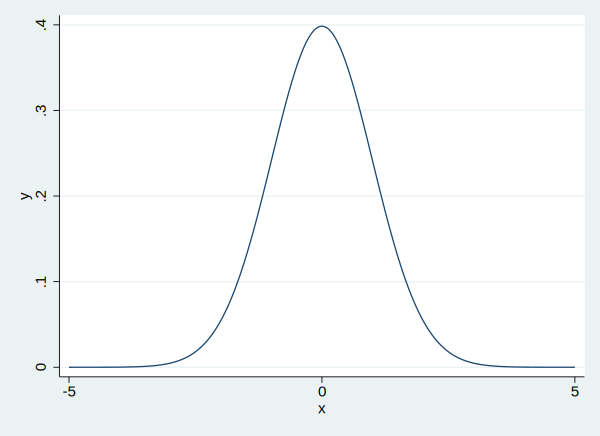

In [10]:
twoway function y=tden(199,x), range(-5 5)

Now, add the title for the above plot. Hint: you could either edit your graph 
by clicking or with the option command `title()`. Please add the following 
title: "Student-t distribution with degree of freedom 199"

In [ ]:
twoway function y=tden(199,x), range(-5 5) title("Add_your_title")

When we do hypothesis test, we have set up the threshold for deciding whether 
the test is significant or not. If you forgot the what the $\alpha$ mean? You 
can review it with the following image.

<img src='/teachings/regression/images/ttest.png'>

The following formula and graph summarize what we did.

$$
t = \frac{52.23-50}{0.725} = \frac{2.23}{0.725} = \frac{2.23-0}{0.725} = 3.0759
$$

<img src="/teachings/regression/images/tillustration.png">

## Independent group t-test 

Now, you want to compare the mean writing score between the group of female 
students and the group of male students. Please run the following 
command and answer the following question:

>is there any significant difference of writing score between the group of female students and the group of male students?

In [11]:
ttest write, by(female)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
    male |      91    50.12088    1.080274    10.30516    47.97473    52.26703
  female |     109    54.99083    .7790686    8.133715    53.44658    56.53507
---------+--------------------------------------------------------------------
combined |     200      52.775    .6702372    9.478586    51.45332    54.09668
---------+--------------------------------------------------------------------
    diff |           -4.869947    1.304191               -7.441835   -2.298059
------------------------------------------------------------------------------
    diff = mean(male) - mean(female)                              t =  -3.7341
Ho: diff = 0                                     degrees of freedom =      198

    Ha: dif

##  checking the relationship between science score and math score

Now, you want to check the relationship between science score and math score by three different ways:

- plot the scatter plot to see the trend
- calculate the correlation
- run a simple regression

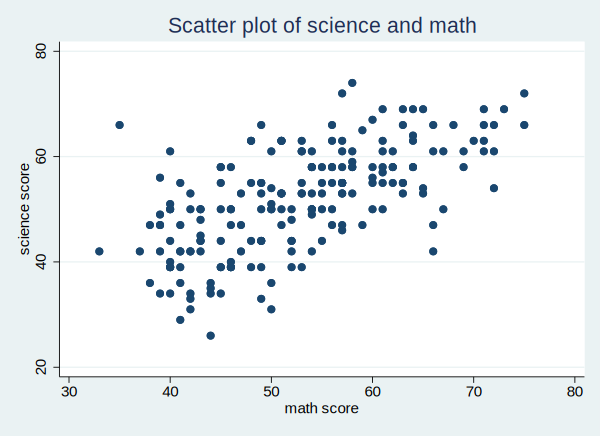

In [15]:
scatter science math, title("Scatter plot of science and math")

In [14]:
correlate science math

(obs=200)

             |  science     math
-------------+------------------
     science |   1.0000
        math |   0.6307   1.0000



In [16]:
regress science math


      Source |       SS           df       MS      Number of obs   =       200
-------------+----------------------------------   F(1, 198)       =    130.81
       Model |  7760.55791         1  7760.55791   Prob > F        =    0.0000
    Residual |  11746.9421       198  59.3279904   R-squared       =    0.3978
-------------+----------------------------------   Adj R-squared   =    0.3948
       Total |     19507.5       199  98.0276382   Root MSE        =    7.7025

------------------------------------------------------------------------------
     science |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        math |     .66658   .0582822    11.44   0.000     .5516466    .7815135
       _cons |   16.75789   3.116229     5.38   0.000     10.61264    22.90315
------------------------------------------------------------------------------


>Question: Compare the trend of graph, correlation coefficient, and regression 
coefficient. please run the following command to think about whether a fitted 
line could summarize the trend well or not?

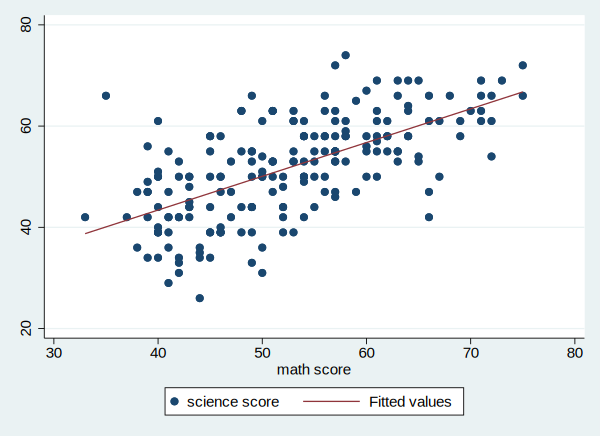

In [17]:
twoway (scatter science math) (lfit science math)

Before you leave, here is a nice figure for you to take away. 

<img src="/teachings/regression/images/inference.png">

<script>
    var div_svg = document.getElementsByClassName('jp-RenderedHTML')

    for (const element of div_svg) {
        var svg_str = element.childNodes[1].srcdoc 
        element.childNodes[1].srcdoc =  svg_str.replace(/width="600px"/i, "width=100%")
    }
</script>